In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [3]:
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
pymaceuticals = pd.merge(study_results,mouse_metadata, how='left', on="Mouse ID")
pymaceuticals.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [5]:
pymaceuticals['Mouse ID'].nunique()

249

In [6]:
duplicate_m = pymaceuticals.loc[pymaceuticals.duplicated(['Mouse ID','Timepoint']),"Mouse ID"].unique()

In [7]:
pymaceuticals.loc[pymaceuticals['Mouse ID']=='g989']

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   
1195     g989         25           56.045564                 1     Propriva   
1380     g989         30           59.082294                 1     Propriva   
1592     g989         35           62.570880                 2     Propriva   

         Sex  Age_months  Weight (g)  
107   Female          21          26  
137   Female          21          26  
329   Female          21          26  
360   Female          21          26  
620   Female          21          26  
681   Female          21          26  
815   Female          21          26  
869   Female          21          26  
950   Female          21          26  
1111  Female          21          26  
1195  Female          21          26  
1380  Female          21          26  
1592  Female          21          26

In [8]:
clean_df = pymaceuticals[pymaceuticals['Mouse ID'].isin(duplicate_m)==False]
clean_df.tail(25)

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
1868     r604         45           62.670759                 3     Naftisol   
1869     z969         45           73.867845                 4     Naftisol   
1870     g791         45           29.128472                 1     Ramicane   
1871     i635         45           58.633404                 3     Propriva   
1872     o287         45           59.741901                 4     Ceftamin   
1873     r701         45           69.778544                 1     Naftisol   
1874     r811         45           37.225650                 1     Ramicane   
1875     u327         45           66.268801                 2     Ketapril   
1876     s565         45           72.588964                 2     Stelasyn   
1877     g570         45           70.492788                 2     Propriva   
1878     i557         45           47.685963                 1    Capomulin   
1879     a644         45           32.978522                 1     Ramicane   
1880     j755         45           69.563621                 1     Naftisol   
1881     e213         45           63.105696                 4     Naftisol   
1882     e584         45           68.359777                 4     Naftisol   
1883     t718         45           63.423695                 4      Placebo   
1884     o562         45           72.455421                 2     Propriva   
1885     i177         45           33.562402                 3     Ramicane   
1886     v991         45           70.167749                 4     Propriva   
1887     z795         45           65.741070                 3     Naftisol   
1888     r944         45           41.581521                 2    Capomulin   
1889     u364         45           31.023923                 3    Capomulin   
1890     p438         45           61.433892                 1     Ceftamin   
1891     x773         45           58.634971                 4      Placebo   
1892     b879         45           72.555239                 2     Stelasyn   

         Sex  Age_months  Weight (g)  
1868    Male           7          30  
1869    Male           9          30  
1870    Male          11          16  
1871    Male          21          26  
1872    Male           2          28  
1873    Male          21          25  
1874    Male           9          19  
1875    Male          17          25  
1876  Female           3          29  
1877    Male          16          29  
1878  Female           1          24  
1879  Female           7          17  
1880    Male          23          27  
1881    Male           8          27  
1882    Male           9          27  
1883  Female          10          30  
1884  Female           4          25  
1885    Male          10          18  
1886  Female          10          30  
1887  Female          13          29  
1888    Male          12          25  
1889    Male          18          17  
1890  Female          11          26  
1891  Female          21          30  
1892  Female           4          26

In [9]:
clean_df['Mouse ID'].nunique()

248

In [10]:
tumor_mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tumor_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [11]:
tumor_med = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_med

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [12]:
tumor_var = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumor_var

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [13]:
tumor_std = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumor_std

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [14]:
tumor_SEM = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
tumor_SEM

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [15]:
summary = pd.DataFrame({"Mean Tumor Volume": tumor_mean, "Median Tumor Volume": tumor_med,
                        "Tumor Volume Variance": tumor_var, "Tumor Volume Std.Dev.": tumor_std,
                        "Tumor Volume Std. Err.": tumor_SEM})
summary

Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std.Dev.  Tumor Volume Std. Err.  
Drug Regimen                                                 
Capomulin                  4.994774                0.329346  
Ceftamin                   6.268188                0.469821  
Infubinol                  6.567243                0.492236  
Ketapril                   8.279709                0.603860  
Naftisol                   8.134708                0.596466  
Placebo                    7.821003                0.581331  
Propriva                   6.622085                0.544332  
Ramicane                   4.846308                0.320955  
Stelasyn                   7.710419                0.573111  
Zoniferol                  6.966589                0.516398

In [16]:
agg_summary = clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)' : ['mean','median','var', 'std',
                                                                           'sem']})
agg_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [17]:
list_drugs = clean_df['Drug Regimen'].value_counts()
list_drugs

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

Text(0, 0.5, '# of Observed Mouse Timepoints')

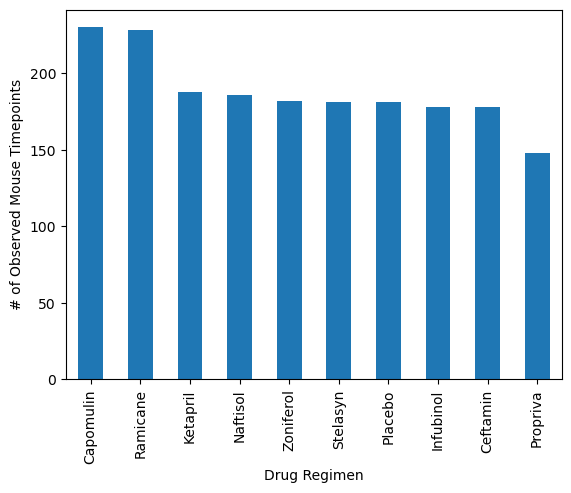

In [18]:
list_drugs.plot(kind='bar')
plt.ylabel('# of Observed Mouse Timepoints')

Text(0, 0.5, '# of Observed Mouse Timepoints')

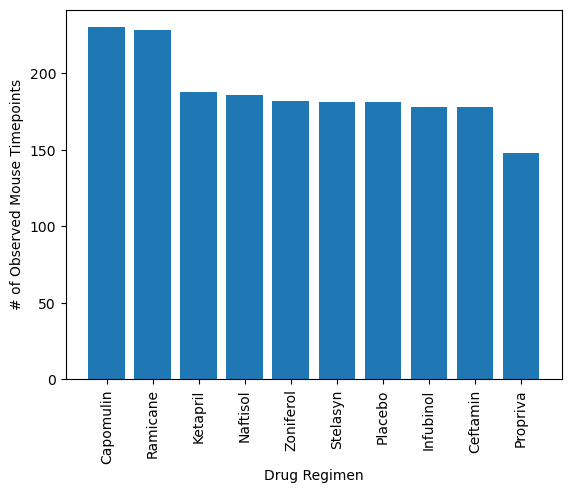

In [19]:
plt.bar(list_drugs.index.values,list_drugs.values)
plt.xlabel('Drug Regimen')
plt.xticks(rotation=90)
plt.ylabel('# of Observed Mouse Timepoints')

In [20]:
mice_sex = clean_df['Sex'].value_counts()
mice_sex

Sex
Male      958
Female    922
Name: count, dtype: int64

Text(0, 0.5, ' ')

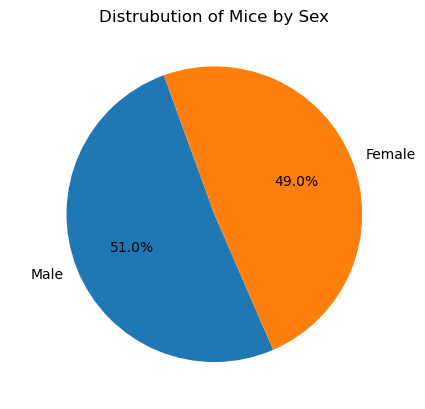

In [21]:
mice_sex.plot(kind='pie',autopct='%1.1f%%', startangle=110, title="Distrubution of Mice by Sex")
plt.ylabel(' ')

Text(0.5, 1.0, 'Distribution of Mice by Sex')

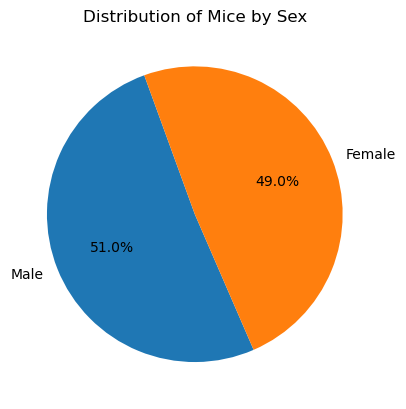

In [22]:
plt.pie(mice_sex.values, labels = mice_sex.index.values, autopct='%1.1f%%',
        startangle=110)
plt.ylabel('')
plt.title("Distribution of Mice by Sex")

In [23]:
greatest_timepoint = clean_df.groupby("Mouse ID")["Timepoint"].max()
greatest_timepoint.head()

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
Name: Timepoint, dtype: int64

In [35]:
timepoint_merge = pd.merge(greatest_timepoint, clean_df, on=("Mouse ID","Timepoint"))
timepoint_merge.head(60)

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0      a203         45           67.973419                 2    Infubinol   
1      a251         45           65.525743                 1    Infubinol   
2      a262         45           70.717621                 4      Placebo   
3      a275         45           62.999356                 3     Ceftamin   
4      a366         30           63.440686                 1     Stelasyn   
5      a401         45           66.794156                 4    Zoniferol   
6      a411         45           38.407618                 1     Ramicane   
7      a444         45           43.047543                 0     Ramicane   
8      a457         10           49.783419                 0     Ketapril   
9      a492         45           60.122011                 1     Stelasyn   
10     a520         45           38.810366                 1     Ramicane   
11     a577         30           57.031862                 2    Infubinol   
12     a644         45           32.978522                 1     Ramicane   
13     a685         45           66.083066                 3    Infubinol   
14     a699         45           62.191414                 1     Propriva   
15     a788         30           60.413709                 1    Zoniferol   
16     a818         45           74.997764                 2     Naftisol   
17     a897         45           72.255963                 4      Placebo   
18     a963         45           62.765093                 1     Stelasyn   
19     b128         45           38.982878                 2    Capomulin   
20     b313         25           55.745146                 1    Zoniferol   
21     b447          0           45.000000                 0     Ceftamin   
22     b487         25           56.057749                 1     Ceftamin   
23     b559         45           73.051363                 1     Naftisol   
24     b742         45           38.939633                 0    Capomulin   
25     b759         30           55.742829                 1     Ceftamin   
26     b879         45           72.555239                 2     Stelasyn   
27     c139         45           72.226731                 2    Infubinol   
28     c264         45           67.942121                 2    Zoniferol   
29     c282         45           65.815165                 2      Placebo   
30     c302         45           64.575222                 4    Zoniferol   
31     c326          5           36.321346                 0    Infubinol   
32     c402         45           74.040390                 3     Stelasyn   
33     c458         30           38.342008                 2     Ramicane   
34     c559         45           61.840058                 4    Zoniferol   
35     c580         30           58.046569                 3     Ketapril   
36     c757         45           69.042841                 3      Placebo   
37     c758         45           33.397653                 1     Ramicane   
38     c766         45           69.823146                 4      Placebo   
39     c819         40           62.175705                 1     Ketapril   
40     c832         45           65.415955                 3     Ketapril   
41     c895         30           60.969711                 2    Infubinol   
42     c927         40           64.183229                 4     Propriva   
43     d133          0           45.000000                 0    Zoniferol   
44     d164         10           47.474645                 1    Zoniferol   
45     d251         45           37.311236                 2     Ramicane   
46     d474         40           60.233733                 1     Ketapril   
47     e213         45           63.105696                 4     Naftisol   
48     e227         45           73.212939                 3      Placebo   
49     e291         25           55.138953                 2     Naftisol   
50     e476         45           62.435404                 1    Infubinol   

In [25]:
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

capomulin_drug = []
ramicane_drug = []
infubinol_drug = []
ceftamin_drug = []

for index, row in timepoint_merge.iterrows():
    if row["Drug Regimen"] == treatments[0]:
        capomulin_drug.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[1]:
        ramicane_drug.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[2]:
        infubinol_drug.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[3]:
        ceftamin_drug.append(row['Tumor Volume (mm3)']) 

drug_summary = pd.DataFrame({treatments[0]:capomulin_drug,
                                  treatments[1]:ramicane_drug,
                                  treatments[2]:infubinol_drug,
                                  treatments[3]:ceftamin_drug})

drug_summary.head()

Capomulin   Ramicane  Infubinol   Ceftamin
0  38.982878  38.407618  67.973419  62.999356
1  38.939633  43.047543  65.525743  45.000000
2  30.485985  38.810366  57.031862  56.057749
3  37.074024  32.978522  66.083066  55.742829
4  40.159220  38.342008  72.226731  48.722078

In [26]:
drug_stat = drug_summary['Capomulin']

quartiles = drug_stat.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Capomulin's potential outliers for Tumor Volume are below {lower_bound}; above {upper_bound}.")


drug_stat = drug_summary['Ramicane']

quartiles = drug_stat.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Ramicane's potential outliers for Tumor Volume are below {lower_bound}; above {upper_bound}.")


drug_stat = drug_summary['Infubinol']

quartiles = drug_stat.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Infubinol's potential outliers for Tumor Volume are below {lower_bound}; above {upper_bound}.")


drug_stat = drug_summary['Ceftamin']

quartiles = drug_stat.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Ceftamin's potential outliers for Tumor Volume are below {lower_bound}; above {upper_bound}.")

Capomulin's potential outliers for Tumor Volume are below 20.70456164999999; above 51.83201549.
Ramicane's potential outliers for Tumor Volume are below 17.912664470000003; above 54.30681135.
Infubinol's potential outliers for Tumor Volume are below 36.83290494999999; above 82.74144559000001.
Ceftamin's potential outliers for Tumor Volume are below 25.355449580000002; above 87.66645829999999.


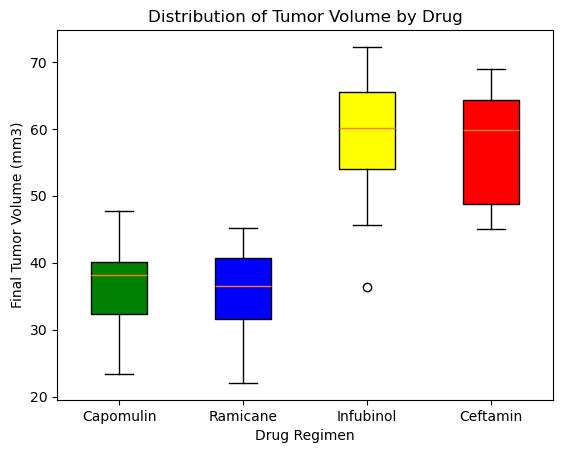

In [27]:
tum_drug_boxplot = pd.DataFrame({
    treatments[0]: drug_summary[treatments[0]],
    treatments[1]: drug_summary[treatments[1]],
    treatments[2]: drug_summary[treatments[2]],
    treatments[3]: drug_summary[treatments[3]]
})

colors = ['green', 'blue', 'yellow', 'red']

fig, ax1 = plt.subplots()
box = ax1.boxplot(tum_drug_boxplot.values, patch_artist=True)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

ax1.set_title('Distribution of Tumor Volume by Drug')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xticklabels(treatments)
ax1.set_xlabel('Drug Regimen')
plt.show()

In [37]:
mouse_i557= clean_df.loc[clean_df["Mouse ID"] == "i557", :]

mouse_i557

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
246      i557          0           45.000000                 0    Capomulin   
365      i557          5           42.261665                 0    Capomulin   
574      i557         10           42.992077                 0    Capomulin   
860      i557         15           43.529876                 0    Capomulin   
1052     i557         20           43.967895                 0    Capomulin   
1157     i557         25           44.596219                 0    Capomulin   
1309     i557         30           45.261384                 0    Capomulin   
1573     i557         35           45.941949                 0    Capomulin   
1712     i557         40           46.821070                 1    Capomulin   
1878     i557         45           47.685963                 1    Capomulin   

         Sex  Age_months  Weight (g)  
246   Female           1          24  
365   Female           1          24  
574   Female           1          24  
860   Female           1          24  
1052  Female           1          24  
1157  Female           1          24  
1309  Female           1          24  
1573  Female           1          24  
1712  Female           1          24  
1878  Female           1          24

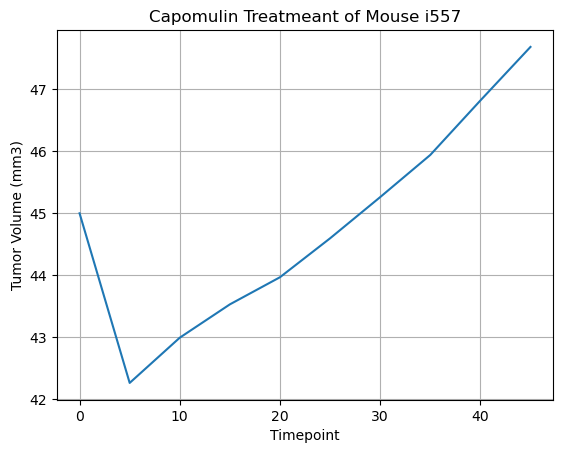

In [38]:
xaxis = mouse_i557["Timepoint"]
yaxis = mouse_i557["Tumor Volume (mm3)"]
plt.title("Capomulin Treatmeant of Mouse i557")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(xaxis, yaxis)
plt.grid()
plt.savefig('Mouse i557-Capomulin')
plt.show()

In [55]:
capomulin_df = clean_df[clean_df["Drug Regimen"] == "Capomulin"]
capomulin_df

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
226      j246          0           45.000000                 0    Capomulin   
227      r554          0           45.000000                 0    Capomulin   
228      s185          0           45.000000                 0    Capomulin   
229      b742          0           45.000000                 0    Capomulin   
...       ...        ...                 ...               ...          ...   
1854     s710         45           40.728578                 1    Capomulin   
1859     j119         45           38.125164                 1    Capomulin   
1878     i557         45           47.685963                 1    Capomulin   
1888     r944         45           41.581521                 2    Capomulin   
1889     u364         45           31.023923                 3    Capomulin   

         Sex  Age_months  Weight (g)  
0     Female           9          22  
226   Female          21          21  
227   Female           8          17  
228   Female           3          17  
229     Male           7          21  
...      ...         ...         ...  
1854  Female           1          23  
1859  Female           7          23  
1878  Female           1          24  
1888    Male          12          25  
1889    Male          18          17  

[230 rows x 8 columns]

In [101]:
capomulin_mean_tvol = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
capomulin_mean_tvol

Mouse ID
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
i557    44.805810
i738    39.141053
j119    44.465236
j246    43.216925
l509    44.434474
l897    42.507261
m601    34.847470
m957    39.049816
r157    45.798970
r554    36.509212
r944    43.367364
s185    34.559143
s710    42.803733
t565    39.328725
u364    39.887495
v923    41.581595
w150    41.384825
w914    41.352452
x401    36.182040
y793    38.506829
Name: Tumor Volume (mm3), dtype: float64

In [100]:
capomulin_mean_wt = capomulin_df.groupby("Mouse ID")["Weight (g)"].mean()
capomulin_mean_wt

Mouse ID
b128    22.0
b742    21.0
f966    17.0
g288    19.0
g316    22.0
i557    24.0
i738    20.0
j119    23.0
j246    21.0
l509    21.0
l897    19.0
m601    17.0
m957    19.0
r157    25.0
r554    17.0
r944    25.0
s185    17.0
s710    23.0
t565    17.0
u364    17.0
v923    21.0
w150    23.0
w914    21.0
x401    15.0
y793    17.0
Name: Weight (g), dtype: float64

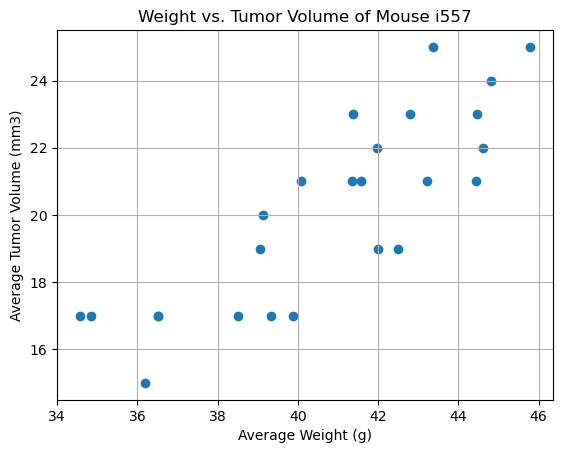

In [103]:
xaxis = capomulin_mean_tvol
yaxis = capomulin_mean_wt

plt.title("Weight vs. Tumor Volume of Mouse i557")
plt.xlabel("Average Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.scatter(xaxis, yaxis)
plt.grid()

plt.savefig('Capomulin_scatter.png')
plt.show()

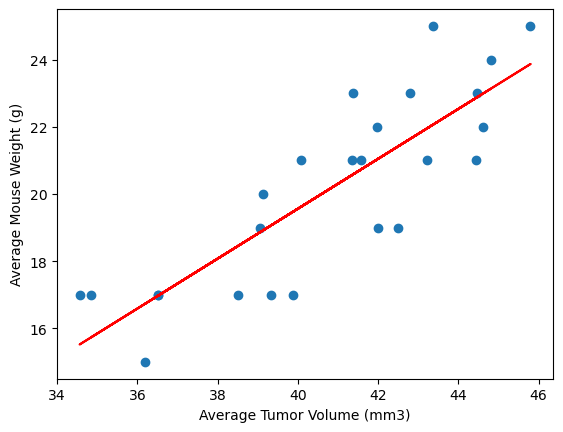

In [109]:
from scipy.stats import linregress

xaxis = capomulin_mean_tvol
yaxis = capomulin_mean_wt
(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xaxis,yaxis)
plt.plot(xaxis,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Average Tumor Volume (mm3)')
plt.ylabel('Average Mouse Weight (g)')
plt.savefig('Capomulin_line.png')
plt.show()

In [112]:
correlation = st.pearsonr(capomulin_mean_tvol, capomulin_mean_wt)
print(f"The correlation between both average tumor volume and mouse weight is: {round(correlation[0],2)}")

The correlation between both average tumor volume and mouse weight is: 0.84
